In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/depression-dataset/depression_data.csv


# **1. Preparation of Data Set**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv("/kaggle/input/depression-dataset/depression_data.csv")

In [4]:
#The contents of the dataset are displayed
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [5]:
#Size of the dataset
data.shape

(413768, 16)

In [6]:
#Structural information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [7]:
data.dtypes

Name                             object
Age                               int64
Marital Status                   object
Education Level                  object
Number of Children                int64
Smoking Status                   object
Physical Activity Level          object
Employment Status                object
Income                          float64
Alcohol Consumption              object
Dietary Habits                   object
Sleep Patterns                   object
History of Mental Illness        object
History of Substance Abuse       object
Family History of Depression     object
Chronic Medical Conditions       object
dtype: object

In [8]:
#Separate categorical and numerical variables in a dataset

categorical_features = [col for col in data.columns if data[col].dtype == "object" or data[col].dtype == "category"]
numerical_features = [col for col in data.columns if data[col].dtype != "object" and data[col].dtype != "category"]

In [9]:
categorical_features, numerical_features

(['Name',
  'Marital Status',
  'Education Level',
  'Smoking Status',
  'Physical Activity Level',
  'Employment Status',
  'Alcohol Consumption',
  'Dietary Habits',
  'Sleep Patterns',
  'History of Mental Illness',
  'History of Substance Abuse',
  'Family History of Depression',
  'Chronic Medical Conditions'],
 ['Age', 'Number of Children', 'Income'])

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,413768.0,49.000713,18.158759,18.00,33.00,49.000,65.0,80.00
Number of Children,413768.0,1.298972,1.237054,0.00,0.00,1.000,2.0,4.00
Income,413768.0,50661.707971,40624.100565,0.41,21001.03,37520.135,76616.3,209995.22


# **2. Missing Value Analysis**

In [11]:
data.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [12]:
# Generate random missing data in the dataset

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

data_copy = add_random_missing_values(dataframe = data,
                               missing_rate = 0.03)

In [13]:
data_copy.isnull().sum()

Name                            12201
Age                             12183
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [14]:
# Total number of missing values
data_copy.isnull().sum().sum()

195621

In [15]:
# Number of non-missing values
data_copy.notnull().sum()

Name                            401567
Age                             401585
Marital Status                  401412
Education Level                 401475
Number of Children              401473
Smoking Status                  401494
Physical Activity Level         401697
Employment Status               401546
Income                          401577
Alcohol Consumption             401286
Dietary Habits                  401666
Sleep Patterns                  401569
History of Mental Illness       401754
History of Substance Abuse      401513
Family History of Depression    401636
Chronic Medical Conditions      401417
dtype: int64

In [16]:
# Total number of non-missing values
data_copy.notnull().sum().sum()

6424667

In [17]:
# Display rows with NaN value in at least 1 column
data_copy[data_copy.isnull().any(axis = 1)]

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20.0,Single,High School,0.0,Former,Active,Employed,44448.91,NaN,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60.0,Widowed,Associate Degree,1.0,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,NaN,No,No
8,Kathryn Taylor,50.0,Divorced,Bachelor's Degree,0.0,Non-smoker,Active,NaN,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413757,Madeline Butler,47.0,Married,Bachelor's Degree,1.0,Former,Sedentary,Employed,106191.74,High,Unhealthy,Poor,NaN,NaN,No,No
413761,Marissa Wright,48.0,Married,Master's Degree,3.0,NaN,Moderate,Employed,130842.60,Low,Healthy,Poor,No,No,No,Yes
413763,Sean Miller,68.0,Married,Master's Degree,0.0,Former,Moderate,Employed,109233.43,Low,NaN,Good,No,No,No,No
413764,Christina Brown,26.0,Single,Bachelor's Degree,NaN,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes


In [18]:
# A library for visualizing missing data
#pip install missingno

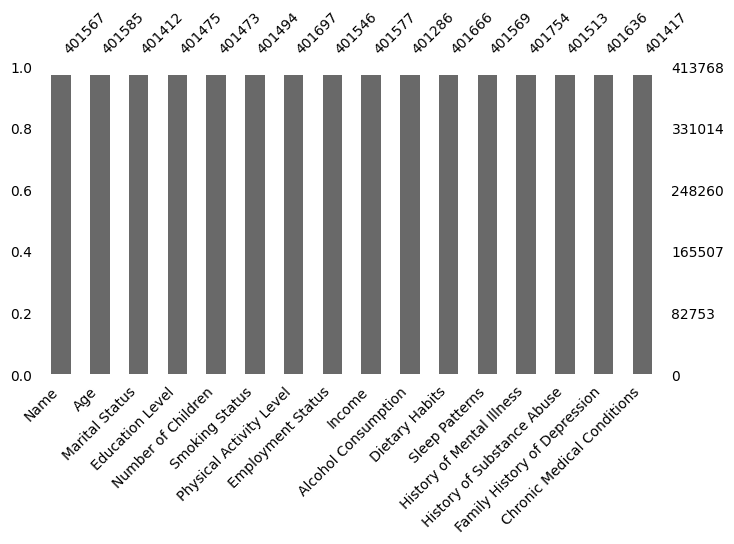

In [19]:
import missingno as msno
# visual of the total number of non-empty values ​​in each column and the number of NaN values ​​that will occur according to the loss percentage
msno.bar(df = data_copy,
         figsize = (8, 4),
         fontsize = 10);

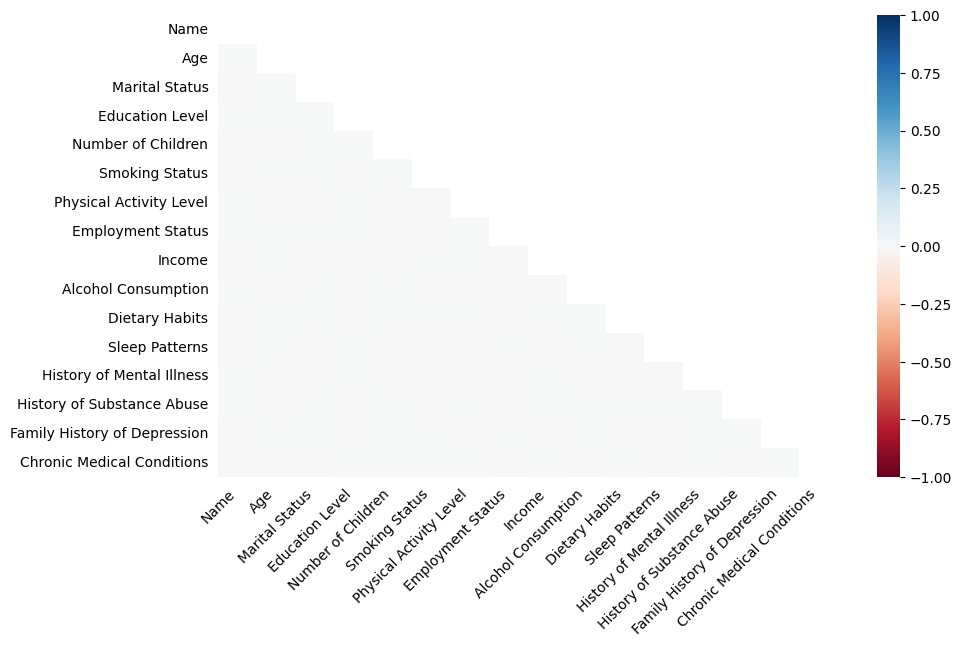

In [20]:
# Correlations of missing data
# Values ​​close to 1 indicate that the missing values ​​of the two columns have similar patterns.
# Values ​​close to -1 indicate that the missing values ​​are mutually exclusive.
# 0 indicates that there is no correlation.
msno.heatmap(df = data_copy,
             figsize = (10, 6),
             fontsize = 10);

# **3. Filling in Missing Numerical Variables**

In [21]:
numerical_features

['Age', 'Number of Children', 'Income']

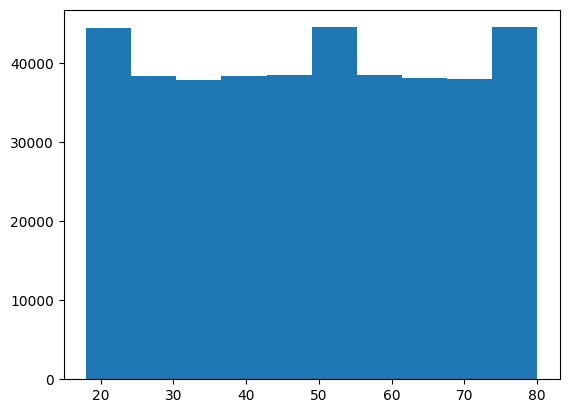

In [22]:
plt.hist(data_copy['Age'])
plt.show()

*The histogram distribution shows almost equal distribution. Therefore, I filled the missing values ​​using KNN.*

In [23]:
df = pd.DataFrame(data_copy)

In [24]:
from sklearn.impute import KNNImputer
# KNN creates an average value according to the nearest neighbors and fills the empty value with it.
imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])

In [25]:
df.isnull().sum()

Name                            12201
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

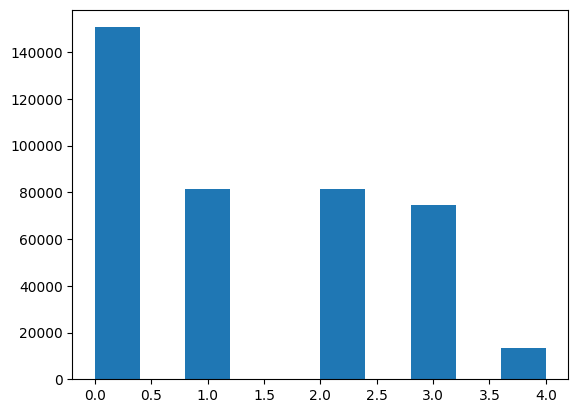

In [26]:
plt.hist(data_copy['Number of Children'])
plt.show()

In [27]:
imputer = KNNImputer(n_neighbors=5)
df[['Number of Children']] = imputer.fit_transform(df[['Number of Children']])

In [28]:
df.isnull().sum()

Name                            12201
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

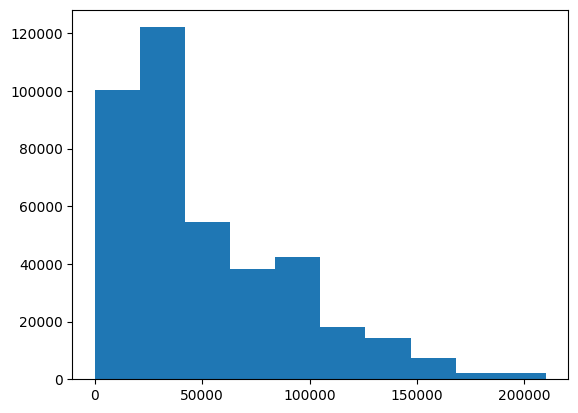

In [29]:
plt.hist(data_copy['Income'])
plt.show()

*I analyzed that the column had a skewed distribution as a result of the histogram. Therefore, I decided to fill in the missing values ​​with the median value.*

In [30]:
median_income = data_copy['Income'].median()
median_income

37508.45

In [31]:
df['Income'] = df['Income'].fillna(median_income)

In [32]:
df.isnull().sum()

Name                            12201
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

# **4. Filling in Missing Categorical Variables**

In [33]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes


In [34]:
categorical_features

['Name',
 'Marital Status',
 'Education Level',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental Illness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions']

*Since the name column has unique values, I filled the empty values ​​in this column with a constant value such as unknown.*

In [36]:
df['Name'].fillna('Unknown', inplace=True)

In [37]:
df.isnull().sum()

Name                                0
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

*I thought the column I wanted to fill was related to a different column and trained the model on that column. I thought that the marital status was related to the number of children present.*

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Non-missing data
train_data = df[df['Marital Status'].notna()]

X = train_data[['Number of Children']]  
y = train_data['Marital Status']

model = RandomForestClassifier()
model.fit(X, y)

# Missing data
test_data = df[df['Marital Status'].isna()]

# Where data is filled in by making predictions
df.loc[df['Marital Status'].isna(), 'Marital Status'] = model.predict(test_data[['Number of Children']])

In [39]:
df.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                 12293
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

*I thought there was a correlation between education level and income.*

In [40]:
train_data = df[df['Education Level'].notna()]

X = train_data[['Income']]  
y = train_data['Education Level']

model = RandomForestClassifier()
model.fit(X, y)

test_data = df[df['Education Level'].isna()]

df.loc[df['Education Level'].isna(), 'Education Level'] = model.predict(test_data[['Income']])

In [41]:
df.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

*I thought that physical activity status was related to age.*

In [42]:
train_data = df[df['Physical Activity Level'].notna()]

X = train_data[['Age']]  
y = train_data['Physical Activity Level']

model = RandomForestClassifier()
model.fit(X, y)

test_data = df[df['Physical Activity Level'].isna()]

df.loc[df['Physical Activity Level'].isna(), 'Physical Activity Level'] = model.predict(test_data[['Age']])

In [43]:
df.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  12274
Physical Activity Level             0
Employment Status               12222
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

*I thought employment status was linked to age.*

In [44]:
train_data = df[df['Employment Status'].notna()]

X = train_data[['Age']]  
y = train_data['Employment Status']

model = RandomForestClassifier()
model.fit(X, y)

test_data = df[df['Employment Status'].isna()]

df.loc[df['Employment Status'].isna(), 'Employment Status'] = model.predict(test_data[['Age']])

In [45]:
df.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  12274
Physical Activity Level             0
Employment Status                   0
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

*I thought sleep patterns were related to age.*

In [46]:
train_data = df[df['Sleep Patterns'].notna()]

X = train_data[['Age']]  
y = train_data['Sleep Patterns']

model = RandomForestClassifier()
model.fit(X, y)

test_data = df[df['Sleep Patterns'].isna()]

df.loc[df['Sleep Patterns'].isna(), 'Sleep Patterns'] = model.predict(test_data[['Age']])

In [47]:
df.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  12274
Physical Activity Level             0
Employment Status                   0
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                      0
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [48]:
df.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413763,Sean Miller,68.0,Married,Master's Degree,0.00000,Former,Moderate,Employed,109233.43,Low,NaN,Good,No,No,No,No
413764,Christina Brown,26.0,Single,Bachelor's Degree,1.29869,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57.0,Single,Bachelor's Degree,0.00000,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71.0,Married,Associate Degree,2.00000,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,62.0,Widowed,Master's Degree,0.00000,Former,Moderate,Employed,107125.74,Moderate,Healthy,Good,No,Yes,No,No


*The remaining columns are answers to specific questions. I tried to provide the connection to other columns indirectly. That's why I created certain conditions and assigned values ​​accordingly.*

In [49]:
# I have associated Chronic Medical Condition with physical activity and age.
df.loc[(df['Chronic Medical Conditions'].isna()) & (df['Physical Activity Level'] == 'Sedentary'), 'Age'] = 'Yes'

df['Chronic Medical Conditions'].fillna('No', inplace=True)

In [50]:
df.isnull().sum()

Name                                0
Age                                 0
Marital Status                      0
Education Level                     0
Number of Children                  0
Smoking Status                  12274
Physical Activity Level             0
Employment Status                   0
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                      0
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions          0
dtype: int64

In [51]:
# Filling with the most frequent value
df['Smoking Status'].fillna(df['Smoking Status'].mode()[0], inplace=True)

*I placed the missing data accordingly in order not to disturb the existing distribution density within each column.*

In [52]:
for col in ["Dietary Habits","History of Mental Illness", "History of Substance Abuse", "Family History of Depression", "Alcohol Consumption"]:
    probs = df[col].value_counts(normalize=True)  
    df[col] = df[col].apply(lambda x: np.random.choice(probs.index, p=probs.values) if pd.isna(x) else x)

In [53]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

# **5. Categorical Variable Analysis**

In [54]:
data_c = data.copy()
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [55]:
data_c.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [56]:
df_categorical = data_c.select_dtypes(include = "object")
df_categorical.head(3)

,Name,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,Married,Bachelor's Degree,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,Married,High School,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,Widowed,Master's Degree,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No


In [57]:
df_categorical["Education Level"].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [58]:
df_categorical["Education Level"].value_counts()

Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64

In [59]:
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 196851 unique values in "Name" categorical feature.

There are 4 unique values in "Marital Status" categorical feature.

There are 5 unique values in "Education Level" categorical feature.

There are 3 unique values in "Smoking Status" categorical feature.

There are 3 unique values in "Physical Activity Level" categorical feature.

There are 2 unique values in "Employment Status" categorical feature.

There are 3 unique values in "Alcohol Consumption" categorical feature.

There are 3 unique values in "Dietary Habits" categorical feature.

There are 3 unique values in "Sleep Patterns" categorical feature.

There are 2 unique values in "History of Mental Illness" categorical feature.

There are 2 unique values in "History of Substance Abuse" categorical feature.

There are 2 unique values in "Family History of Depression" categorical feature.

There are 2 unique values in "Chronic Medical Conditions" categorical feature.



In [60]:
edu_level = data_c["Education Level"].unique().tolist()[:]
edu_level

["Bachelor's Degree",
 'High School',
 "Master's Degree",
 'Associate Degree',
 'PhD']

In [61]:
from pandas.api.types import CategoricalDtype

data_c["Education Level"] = data_c["Education Level"].astype(CategoricalDtype(categories = edu_level, ordered = True))

In [62]:
data_c["Education Level"].head()

0    Bachelor's Degree
1          High School
2      Master's Degree
3      Master's Degree
4          High School
Name: Education Level, dtype: category
Categories (5, object): ['Bachelor's Degree' < 'High School' < 'Master's Degree' < 'Associate Degree' < 'PhD']

# **6. Visualization of Categorical Data**

<Axes: xlabel='Education Level'>

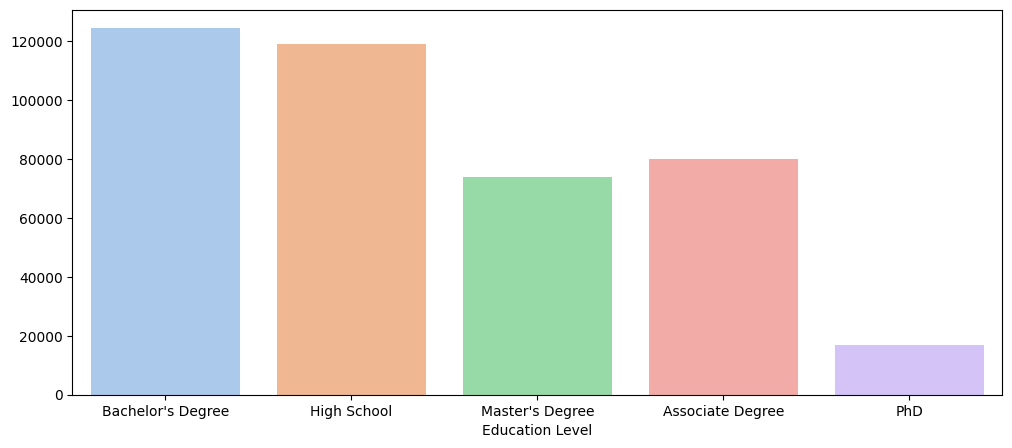

In [63]:
# Education level distribution of people in the dataset. 
im_1 = data_c["Education Level"].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=im_1.index, y=im_1.values, palette='pastel')

* According to this analysis, the most people in this data set have a bachelor's degree and the least have a PhD.

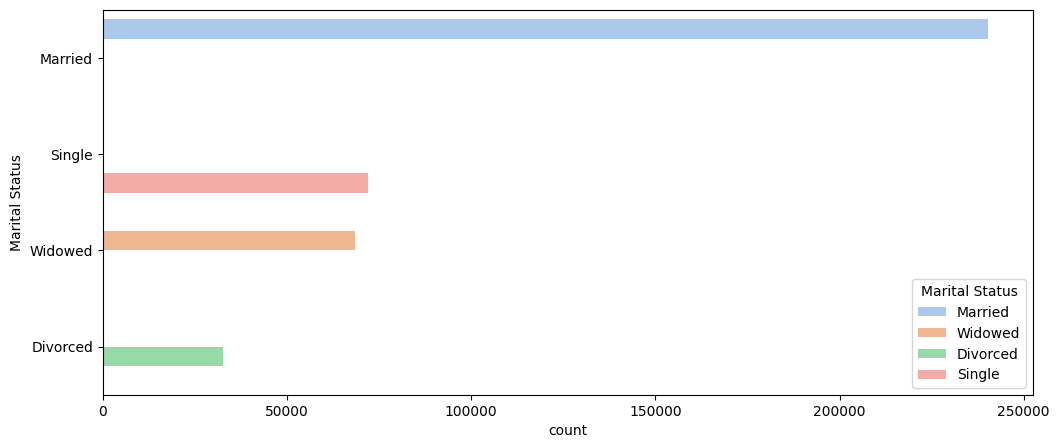

In [64]:
# Analysis of the marital status of people in the dataset.
df = pd.DataFrame(data)
plt.figure(figsize=(12,5))
sns.countplot(data = df, y = "Marital Status", hue = "Marital Status", order = df["Marital Status"].value_counts().index,
              palette = "pastel");

* I observed that the most people diagnosed with depression in the data set were married people and the least were divorced people.

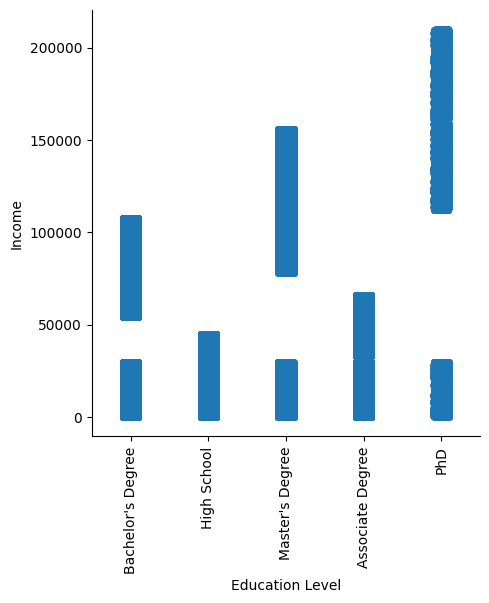

In [65]:
# Replace inf with NaN
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Income distributions according to education levels.
sns.catplot(data=data, x="Education Level", y="Income")
plt.xticks(rotation=90)
plt.show()

* I observe that while people with a PhD degree have the highest income levels, the lowest level is a high school graduate.

In [66]:
# Average ages according to physical activity status.
df_inc = data.groupby("Physical Activity Level")["Age"].mean().reset_index()
df_inc

,Physical Activity Level,Age
0,Active,34.037526
1,Moderate,50.278237
2,Sedentary,54.535375


Text(0.5, 1.0, 'Average Ages of Physical Activity Levels')

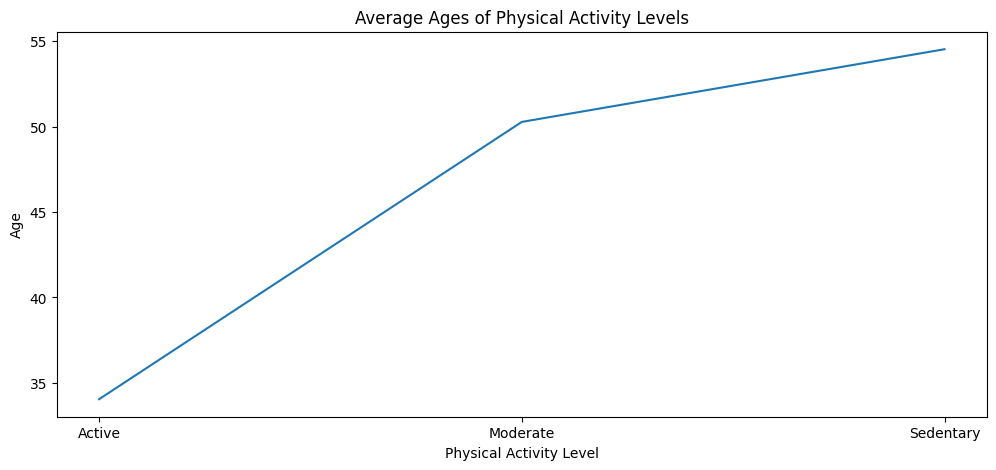

In [67]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Physical Activity Level', y='Age', data=df_inc)
plt.title('Average Ages of Physical Activity Levels')

* According to this graph, it has been observed that as people get older, their mobility rate decreases.

<Axes: xlabel='Marital Status', ylabel='Age'>

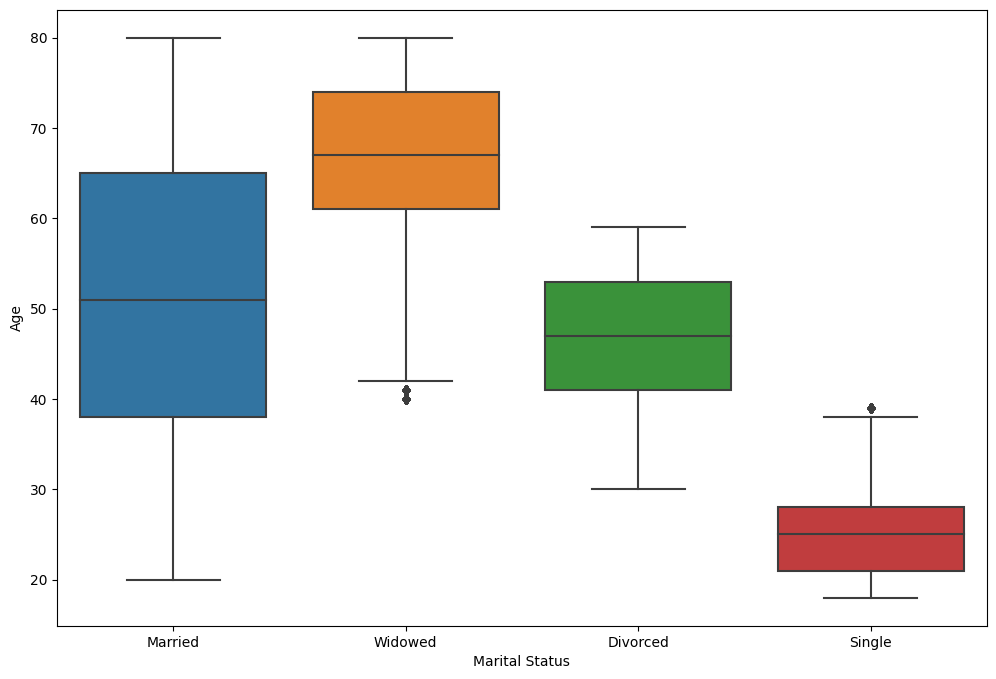

In [87]:
plt.figure(figsize = (12, 8))
sns.boxplot(data=data, x='Marital Status', y='Age')

* According to this graph, I observed that married people are on average in their 50s, widows are generally over 60, divorced people are between 40-50, and single people are on average 25. I observed that in outliers, both widows and single people are rarely in their 40s.

# **7. Numerical Variable Analysis**

In [70]:
df_numerical = data.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Age,Number of Children,Income
0,31,2,26265.67
1,55,1,42710.36
2,78,1,125332.79
3,58,3,9992.78
4,18,0,8595.08


In [71]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,413768.0,49.000713,18.158759,18.00,33.00,49.000,65.0,80.00
Number of Children,413768.0,1.298972,1.237054,0.00,0.00,1.000,2.0,4.00
Income,413768.0,50661.707971,40624.100565,0.41,21001.03,37520.135,76616.3,209995.22


# **8. Visualization of Numerical Variables**

Text(0.5, 1.0, 'Income Distribution')

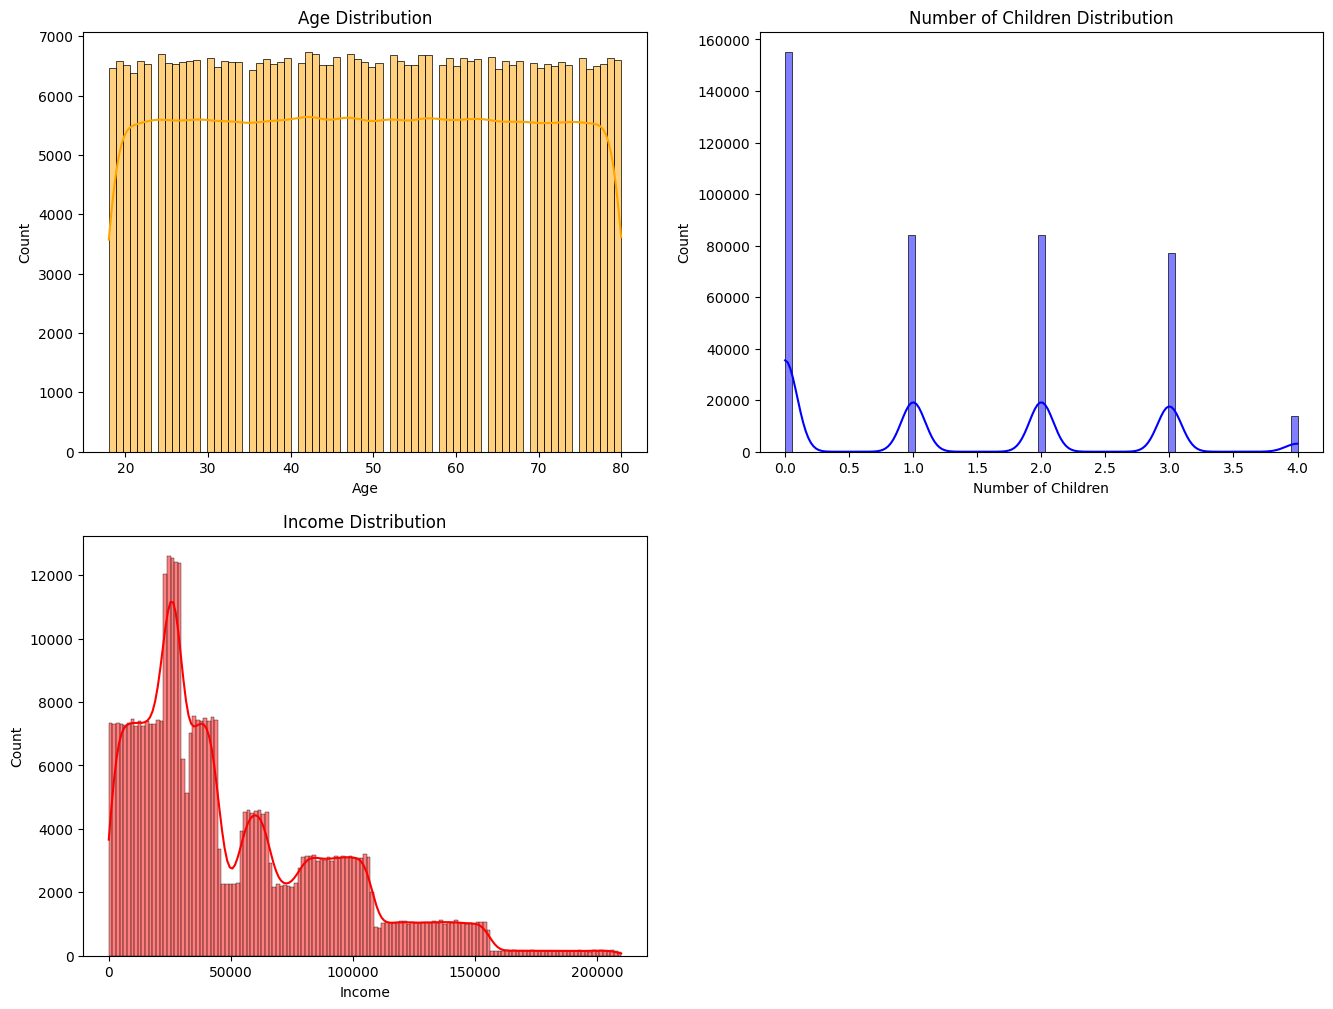

In [72]:
# Histogram distribution of numerical variables
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.histplot(data=df_numerical, x='Age', multiple='stack', color='orange', kde=True)
plt.title('Age Distribution')

plt.subplot(2,2,2)
sns.histplot(data=df_numerical, x='Number of Children', multiple='stack', color='blue', kde=True)
plt.title('Number of Children Distribution')

plt.subplot(2,2,3)
sns.histplot(data=df_numerical, x='Income', multiple='stack', color='red', kde=True)
plt.title('Income Distribution')

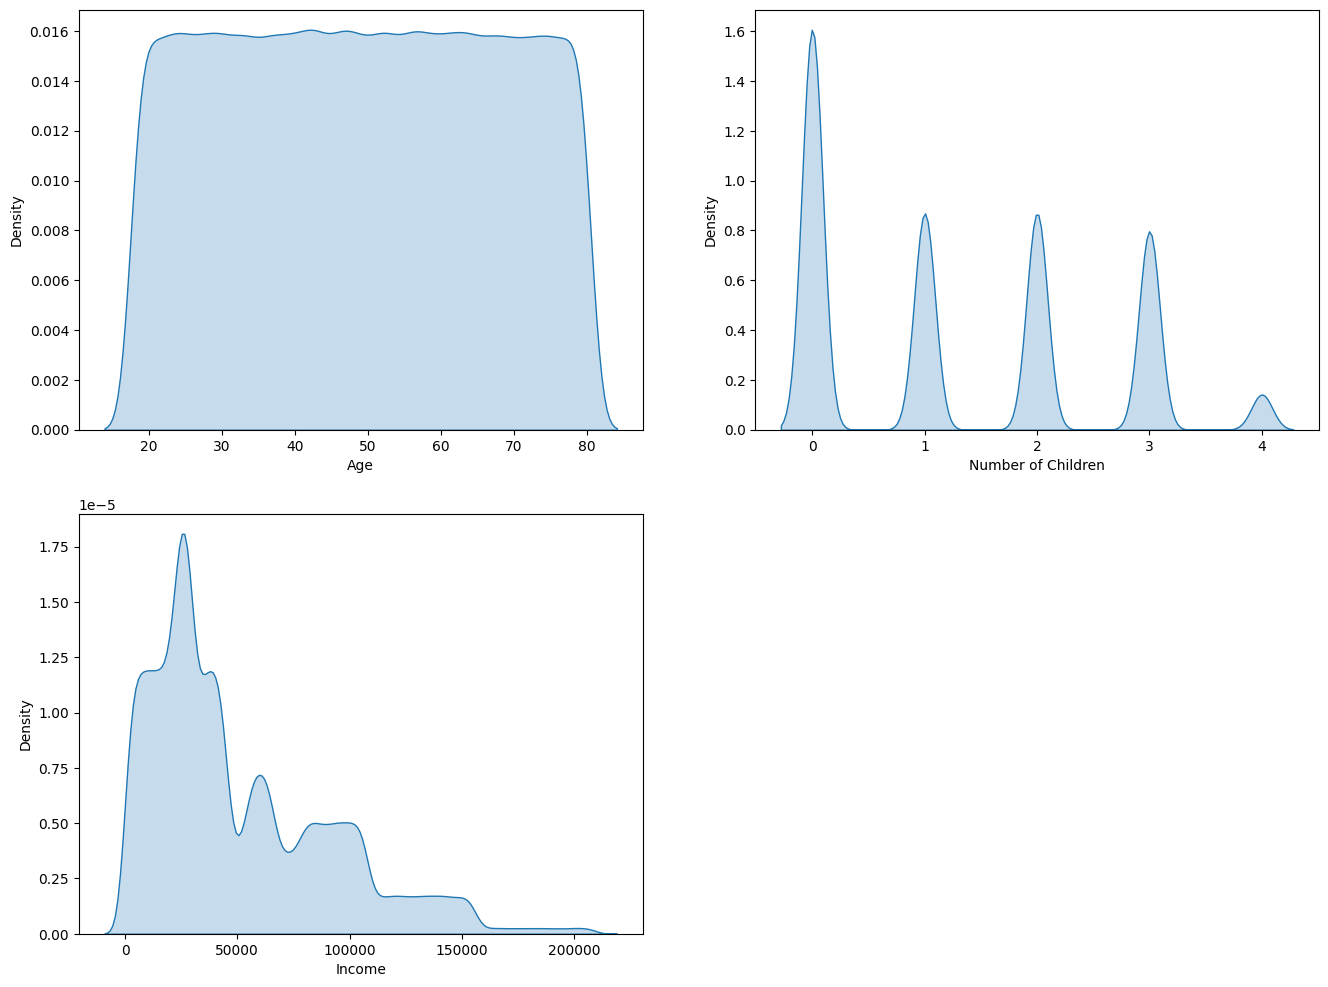

In [73]:
# Density of numerical variables
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.kdeplot(df_numerical['Age'], fill = True);

plt.subplot(2,2,2)
sns.kdeplot(df_numerical['Number of Children'], fill = True);

plt.subplot(2,2,3)
sns.kdeplot(df_numerical['Income'], fill = True);


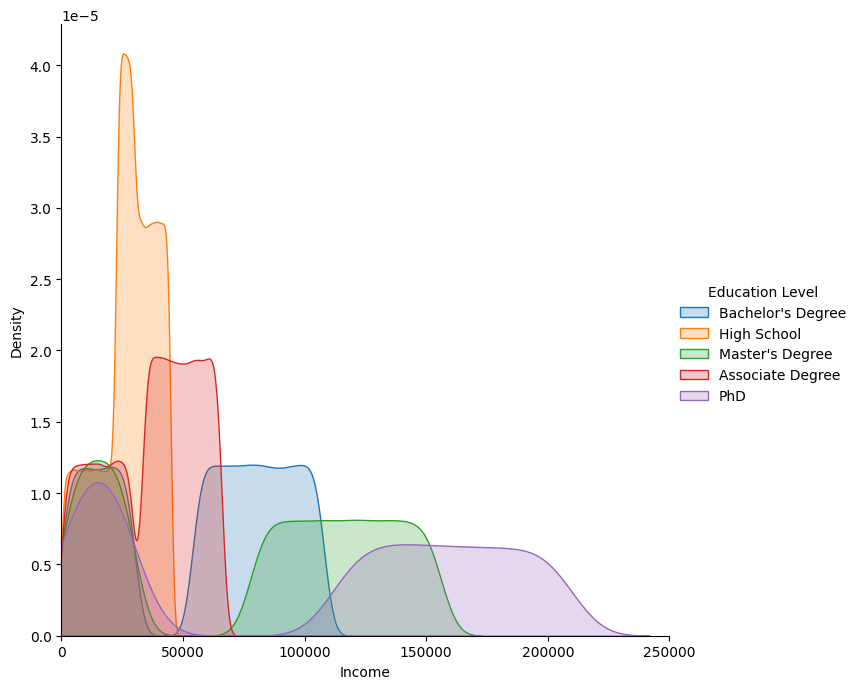

In [75]:
# Income density distribution by education levels
sns.FacetGrid(data = data,
              hue = "Education Level",
              height = 7,
              xlim = (0, 250000)).map(sns.kdeplot, "Income", fill = True).add_legend();

#  **9. Visualization of The Entire Dataset**

In [76]:
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [77]:
# Effects of education levels and employment status on income
data_em = data.groupby(['Education Level', 'Employment Status'])['Income'].mean().reset_index()
data_em

,Education Level,Employment Status,Income
0,Associate Degree,Employed,49456.695810
1,Associate Degree,Unemployed,15068.171176
2,Bachelor's Degree,Employed,80988.859968
3,Bachelor's Degree,Unemployed,15051.235088
4,High School,Employed,33743.376760
5,High School,Unemployed,15046.873131
6,Master's Degree,Employed,116877.224875
7,Master's Degree,Unemployed,14957.836281
8,PhD,Employed,160405.381394
9,PhD,Unemployed,14946.667647


<Axes: xlabel='Education Level', ylabel='Income'>

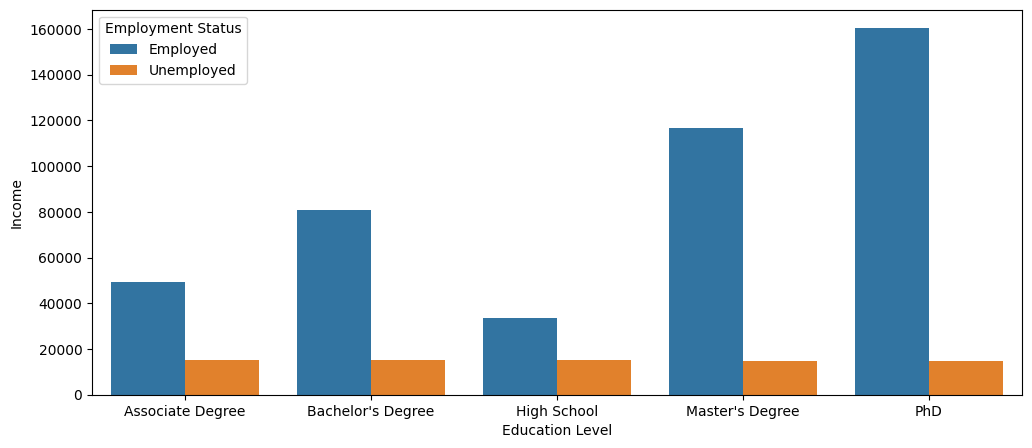

In [78]:
plt.figure(figsize=(12,5))
sns.barplot(data_em, x='Education Level', y='Income', hue='Employment Status')

* In this graph, I observed that as the level of education increases, the income level of people who are employed also increases. I observed that the increase in the level of education of people who are not employed does not affect their income level much.

In [79]:
# Effect of activity level and dietary habits on depression
data_al = data.groupby('Physical Activity Level')['Dietary Habits'].value_counts().reset_index()
data_al

,Physical Activity Level,Dietary Habits,count
0,Active,Moderate,33228
1,Active,Unhealthy,24550
2,Active,Healthy,21127
3,Moderate,Moderate,67728
4,Moderate,Healthy,48305
5,Moderate,Unhealthy,41980
6,Sedentary,Unhealthy,104287
7,Sedentary,Moderate,69490
8,Sedentary,Healthy,3073


<Axes: xlabel='Physical Activity Level', ylabel='count'>

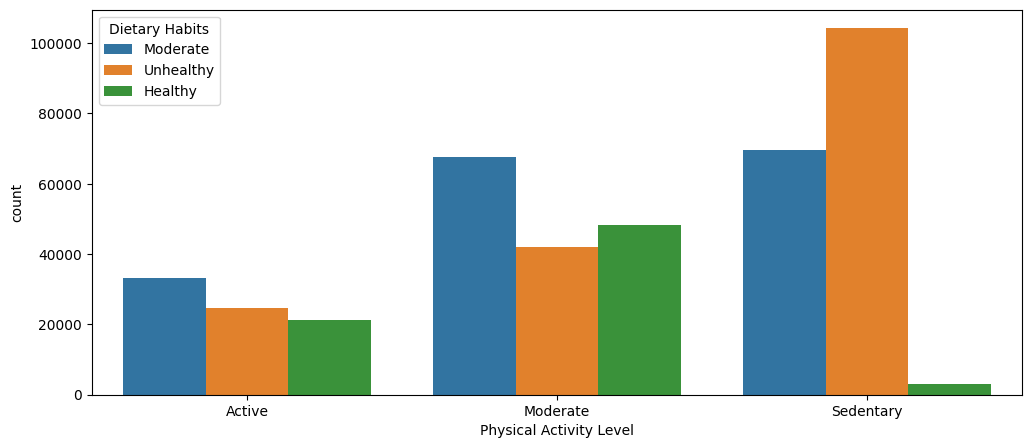

In [80]:
plt.figure(figsize=(12,5))
sns.barplot(data=data_al, x='Physical Activity Level', y='count', hue='Dietary Habits')

* Finally, in this graph, I examined the physical activity levels and health nutrition status of people diagnosed with depression. I observed that people who were active and a healthy diet were diagnosed with depression less, while people who were inactive and had an unhealthy diet were diagnosed with depression more.